# Maximum Likelihood Estimation

The maximum likelihood estimation is a method that determines values for parameters of the model. It is the statistical method of estimating the parameters of the probability distribution by maximizing the likelihood function.

Steps to formulate MLE problem:
1. Perform a certain experiment to collect the data.
2. Choose a parametric model of the data, with certain modifiable parameters.
3. Formulate the likelihood as an objective function to be maximized.
4. Maximize the objective function and derive the parameters of the model.

In Maximum Likelihood Estimation, we maximize the conditional probability of observing the data (X) given a specific probability distribution and its parameters (ɵ)

Lets understand this with applying this approach to Linear Regression problem.

#Linear Regression with MLE

##What do we exactly do in Linear Regression?

Fit a line.

---

**y$_i$**$_{pred}$=**x$_i$w** where x denotes a 1 x k data vector and w is the k x 1 weight vector.

So now what will be the error?

*e*=**y$_i$**-**y$_i$**$_{pred}$

*e*=**y$_i$**-**x$_i$w**

This is for just one $i^{th}$ data point.

---

For all the points available:

**e**=**y**-**Xw**

Here **X** denotes the n x k data matrix. (n datapoints). And **e** is the error vector.

---

We assume that the vector of errors **e** has a multivariate normal distribution conditional on X, with mean equal to 0 and covariance matrix equal to $σ^2I$


What does this assumption implies that non-diagonal entries of Σ are zero?

---

It means all N errors are independent of each other.
Very important implication

Now lets come back to this equation:

**y$_i$**=**x$_i$w**+*e*  

(Actually this the same error equation, just e is -e, but the sign doesn't matter(like the +c in integration))

As *e* has normal distribution N(0,σ$^2$), $y_i$ also is normally distributed as N(**x$_i$w**,σ$^2$).

So,
$p_Y(y_i|x_i)=\frac{1}{\sqrt{2π\sigma^2}}e^\frac{-(y_i-x_iw)^2}{2σ^2}$

---


Now we form our **Likelihood function**

$L(w,σ ; y, X)=Π$ $p_Y(y_i|x_i)$  (independent !!)

$L(w,σ ; y, X)=Π$ $\frac{1}{\sqrt{2π\sigma^2}}e^\frac{-(y_i-x_iw)^2}{2σ^2}$

$L(w,σ ; y, X)=\frac{1}{(\sqrt{2π\sigma^2})^N}$ $e^{\sum_{i=1}^{N}\frac{-(y_i-x_iw)^2}{2σ^2}}$

This is the likelihood function that we will maximize.

Our goal is to find the parameters $w$ and $σ$ such that this is maximized.

As log is a monotonic function we are allowed to do this:

$log(L(w,σ ; y, X))=-\frac{N}{2}({2π\sigma^2})-\frac{1}{2σ^2}{\sum_{i=1}^{N}(y_i-x_iw)^2}$

(log likelihood)

We can maximize this or we can minimize this equation:

$-log(L(w,σ ; y, X))=\frac{N}{2}({2π\sigma^2})+\frac{1}{2σ^2}{\sum_{i=1}^{N}(y_i-x_iw)^2}$

(Negative log likelihood)

---

Do you find any similarity between this equation and Least Squares equation?

Any differences?

---

What's the next step now?

To get the minima ($w$), we differentiate the negative log likelihood equation w.r.t $w$ and equate it to 0.

(Similarly can be done for $σ$ too.)

Can you try it now?

Does the result match Least Square method's result?

##Result



$w_{opt}=(X^TX)^{-1}X^Ty$

And if you want σ:

$σ_{opt}=\frac{1}{N}\sum_{i=1}^{N}{( y_i-x_iw_{opt} )}^2$

## Simple Example Code

In [1]:
import numpy as np
from scipy.optimize import minimize

k=3
n=100
np.random.seed(12)
X = np.random.rand(n, k)
actual_weights=np.random.randint(10,size=(k,1))
y =  X@actual_weights + 1 + 0.1 * np.random.randn(n, 1)

In [86]:
def neg_log_likelihood(w, X, y):
    y_pred = X.dot(w[:-1]) + w[-1] # bias term
    error = y - y_pred
    return 0.5 * np.sum(error ** 2)/len(y)

In [87]:
initial_w = np.random.randn(k+1)
def gradientDescent(w,x,y,iter,alpha):
  for i in range(iter):
    w=w.reshape(-1,1)
    s=(x@w).reshape(-1,1)
    e=y-s
    delJ=(x.T@(-e))/len(x)  #How did we get this?? You will learn this in MML
    w=w-alpha*delJ
  return w

w=gradientDescent(initial_w,np.append(X,np.ones((n,1)),axis=1),y,500,0.1)

In [88]:
print(w)
print(actual_weights)
print(neg_log_likelihood(w,X,y))

[[-0.31783026]
 [ 6.37680433]
 [ 8.37897721]
 [ 1.77581004]]
[[0]
 [7]
 [9]]
0.027240912160604914


In [89]:
X=np.append(X,np.ones((n,1)),axis=1)
w_new=(np.linalg.inv(X.T@X)@X.T)@y

In [90]:
w_new

array([[-0.04403079],
       [ 6.96626565],
       [ 8.95358054],
       [ 1.06012242]])

In [91]:
print(w)
print(actual_weights)

[[-0.31783026]
 [ 6.37680433]
 [ 8.37897721]
 [ 1.77581004]]
[[0]
 [7]
 [9]]


# Regularized Regression

As models become more and more complex, there is a chance of **overfitting**.

Is very high complexity model good? Why or why not?

Higher complexity models will perfectly fit our training data? Then isn't it good?

No. They don't just perfectly fit your data, they "overfit" the data.

What it means that you get nearly zero (or even zero) training error, but your model does not perform well not test data.



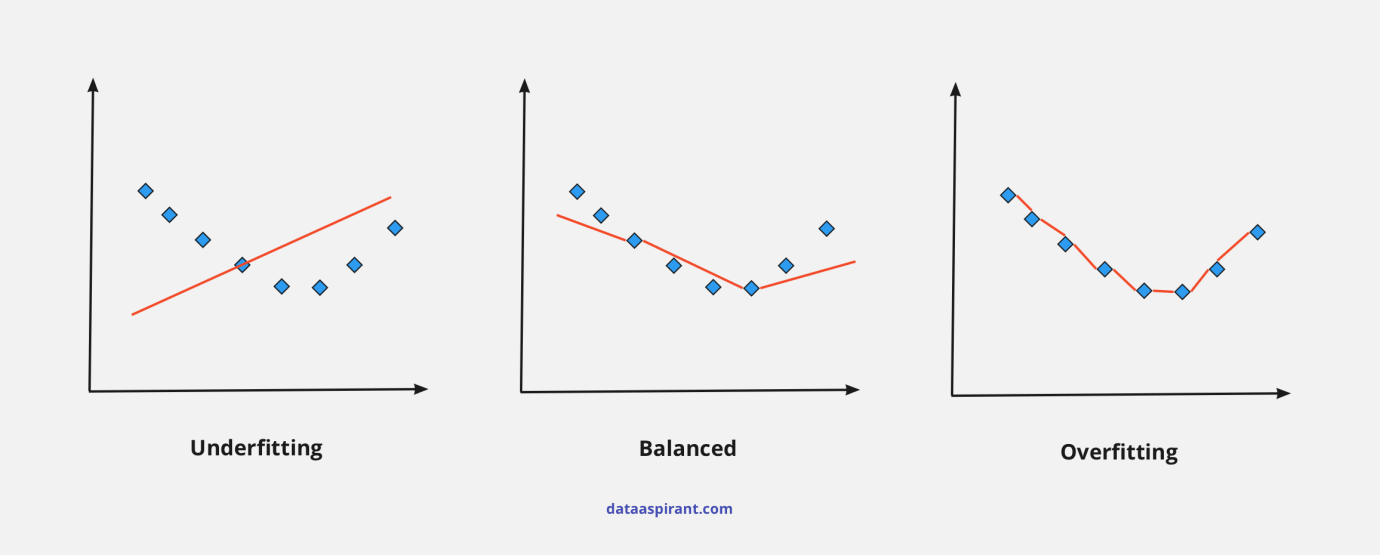

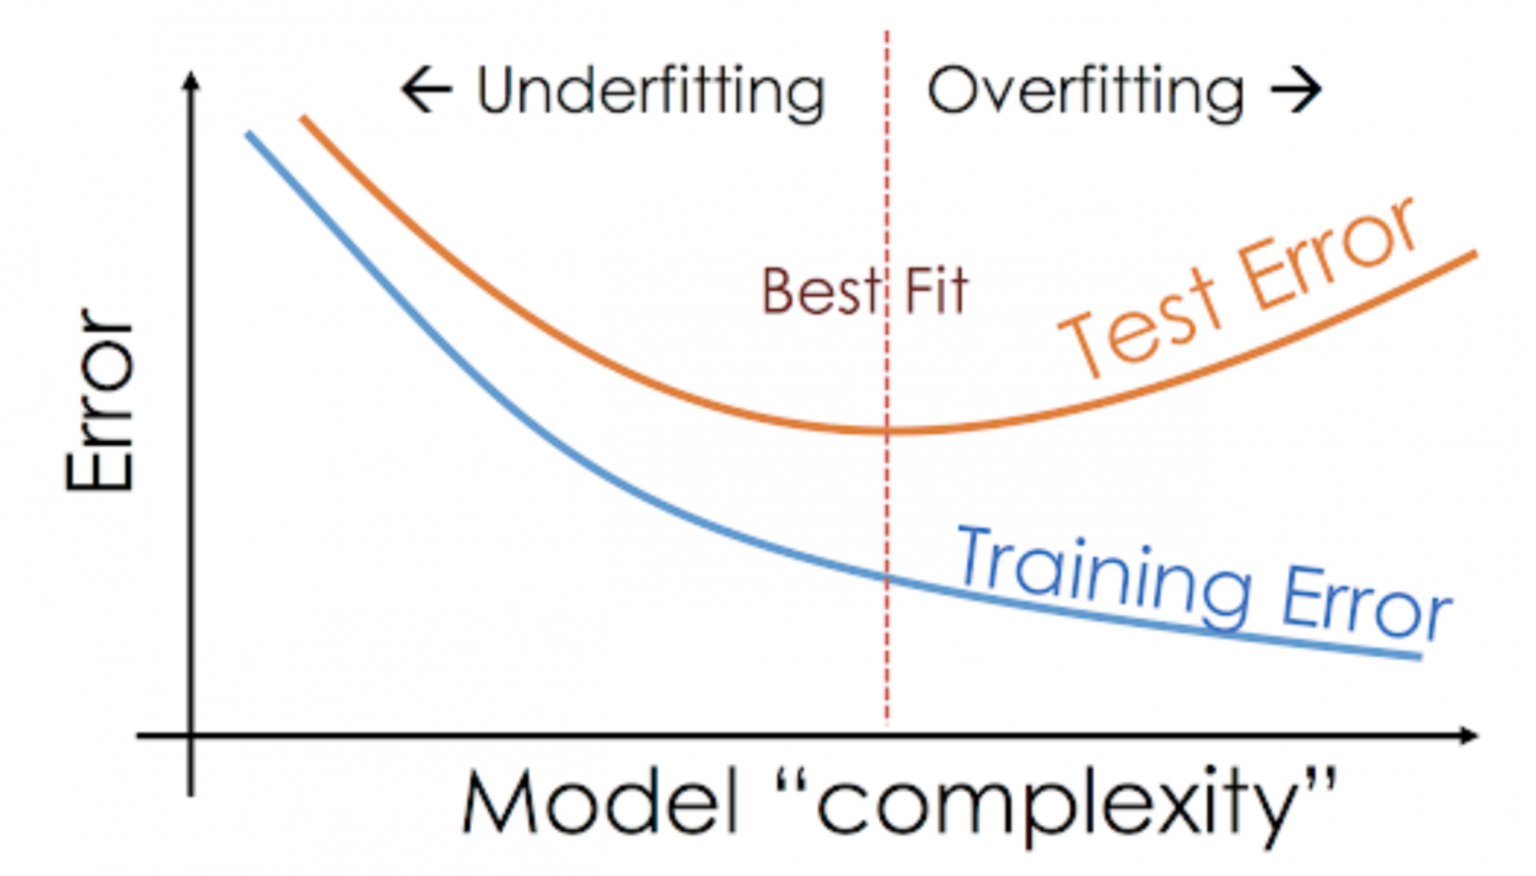

What can we do to avoid overfitting?

Maybe find the optimal model complexity.

Lets say while doing polynomial regression, you have to decide the degree.

A very high degree polynomial will overfit, whereas low degree polynomial will underfit.

From the above graph, can you come up with a plan on finding the optimal model?

(Doesn't matter if its not efficient)

---

OR

We can do Regularized Regression

As we increase the polynomial order in polynomial regression, it is found that magnitude of the coefficients increases drastically.

To fit some data points exactly, the higher order polynomial may require very high coefficients.

So in regularized regression, we *penalize* it.

How?

We change our loss function.

For simple regression it was:

$L(w)=∑_{i=1}^{N}(y_i-x_iw)^2$

Now we will add another term:

$L(w)=∑_{i=1}^{N}(y_i-x_iw)^2+λ∑_{j=1}^{K}|w_j|$


When we try to minimize this loss function we will make sure that we don't let the magnitude of coeeficients increase drastically.


The above represents-
### **Lasso Regression**

---
---

$L(w)=∑_{i=1}^{N}(y_i-x_iw)^2+λ∑_{j=1}^{K}w_j^2$

This is
### **Ridge Regression**

---
---

Can you all try to get the closed form equation for this?

## Code example

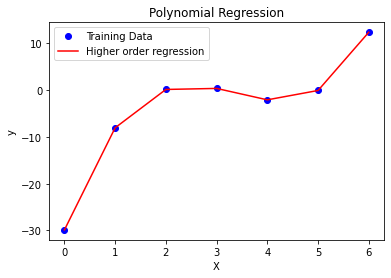

[ 1.19827712e+01  9.07061997e+00  4.81999452e+00 -2.23242335e-01
 -3.83929698e+00 -2.36340030e+00  3.46976588e+00 -1.25364589e+00
  1.87956678e-01 -1.02673226e-02]


In [2]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import matplotlib.pyplot as plt


# Generate noisy data
np.random.seed(42)
X = np.arange(0,7,1)
n=len(X)
y = (X-3)*(X-2)*(X-5)+np.random.normal(0,0.25,n)

# Add more polynomial features for complexity
poly = PolynomialFeatures(degree=10, include_bias=False)
train_x = poly.fit_transform(X.reshape(-1, 1))

model=LinearRegression()
model.fit(train_x, y)
res=model.predict(train_x)
plt.figure(figsize=(6, 4))
plt.plot(X, y, 'bo', label="Training Data")
plt.plot(X, res, 'r-', label="Higher order regression")
plt.legend()
plt.title("Polynomial Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.show()
print(model.coef_)

In [3]:
test_x=np.array([12,23,-4])
y_test=model.predict(poly.transform(test_x.reshape(-1,1)))
print(y_test)
print((test_x-2)*(test_x-5)*(test_x-3))

[-8.86344743e+07 -1.73535559e+11 -2.05092719e+05]
[ 630 7560 -378]


### Linear regression Vs Regularized regression

/home/gandalf/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.719e+00, tolerance: 1.276e-03
  model = cd_fast.enet_coordinate_descent(


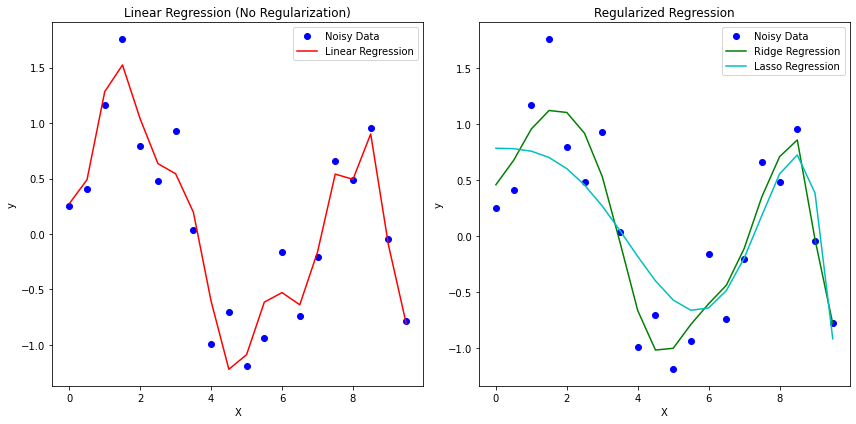

Coefficients (Linear Regression): [-4.59552500e-01  1.45171836e+00  1.12790091e+00 -3.70382404e-01
 -1.32412544e+00 -3.68064915e-02  1.38851027e+00 -1.12491495e+00
  4.53180596e-01 -1.11183148e-01  1.76621621e-02 -1.83273708e-03
  1.20265568e-04 -4.53863149e-06  7.51575542e-08]
Coefficients (Ridge Regression): [ 3.00220188e-01  2.60740964e-01  9.53846159e-02 -9.49231793e-02
 -1.46847147e-01  2.88380219e-02  1.41753582e-01 -1.31705156e-01
  5.71334206e-02 -1.47897490e-02  2.45038531e-03 -2.63064515e-04
  1.77528810e-05 -6.85842055e-07  1.15851579e-08]
Coefficients (Lasso Regression): [-0.00000000e+00 -0.00000000e+00 -2.87964644e-02  2.61688815e-03
  1.97303495e-04  4.15157109e-06 -3.29306897e-07 -6.34159800e-08
 -6.87750217e-09 -6.04136522e-10 -4.49412176e-11 -2.62151274e-12
 -6.44345529e-14  1.31389142e-14  3.18671356e-15]


In [4]:


# Generate noisy sine wave data
np.random.seed(42)
X = np.arange(0, 10, 0.5)
y = np.sin(X) + 0.5 * np.random.randn(20)

# Create polynomial features
degree = 15
poly = PolynomialFeatures(degree=15, include_bias=False)
X_poly = poly.fit_transform(X.reshape(-1, 1))

# Fit Linear Regression without regularization
lr = LinearRegression()  # No regularization
lr.fit(X_poly, y)
coefficients_lr = lr.coef_

# Fit Ridge Regression
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X_poly, y)
coefficients_ridge = ridge_reg.coef_

# Fit Lasso Regression
lasso_reg = Lasso(alpha=1)
lasso_reg.fit(X_poly, y)
coefficients_lasso = lasso_reg.coef_

# Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(X, y, 'bo', label="Noisy Data")
plt.plot(X, lr.predict(X_poly), 'r-', label="Linear Regression")
plt.legend()
plt.title("Linear Regression (No Regularization)")
plt.xlabel("X")
plt.ylabel("y")

plt.subplot(122)
plt.plot(X, y, 'bo', label="Noisy Data")
plt.plot(X, ridge_reg.predict(X_poly), 'g-', label="Ridge Regression")
plt.plot(X, lasso_reg.predict(X_poly), 'c-', label="Lasso Regression")
plt.legend()
plt.title("Regularized Regression")
plt.xlabel("X")
plt.ylabel("y")

plt.tight_layout()
plt.show()

print("Coefficients (Linear Regression):", coefficients_lr)
print("Coefficients (Ridge Regression):", coefficients_ridge)
print("Coefficients (Lasso Regression):", coefficients_lasso)


### Changing hyperparameter

[-3.73379758e-01 -1.47204713e+00  8.57050983e+00 -5.66327646e+00
 -3.64061008e+00  6.12986428e+00 -3.24243518e+00  8.63854644e-01
 -1.03535061e-01 -4.85497126e-03  3.65106043e-03 -5.76756556e-04
  4.70355784e-05 -2.03225966e-06  3.69269827e-08]


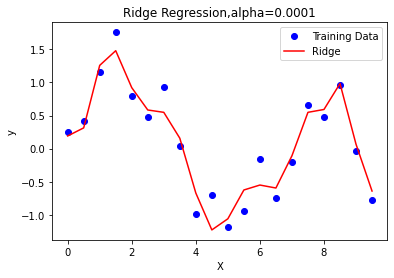

[-8.72191115e-01  2.00517909e+00  1.99988379e+00 -1.90231842e+00
 -1.43038583e+00  1.52461376e+00 -3.13369419e-02 -4.50079301e-01
  2.51080505e-01 -7.06287530e-02  1.21105952e-02 -1.31970885e-03
  8.95997808e-05 -3.46709311e-06  5.85246644e-08]


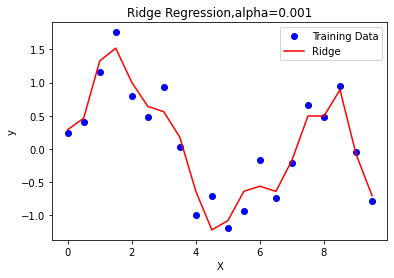

[-2.22625255e-01  1.43828256e+00  9.43802873e-01 -6.26242551e-01
 -1.08818923e+00  2.51911461e-01  9.20395166e-01 -8.41491265e-01
  3.54477183e-01 -8.91357627e-02  1.43881053e-02 -1.51004523e-03
  9.99381692e-05 -3.79666687e-06  6.32076491e-08]


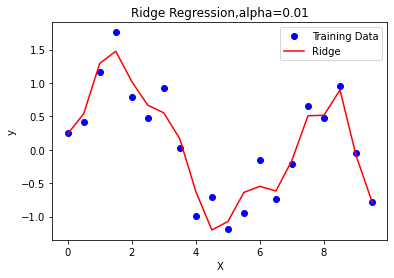

[ 5.00513548e-01  7.60820276e-01  3.30544915e-01 -3.51377786e-01
 -5.60036292e-01  1.14718973e-01  5.56924722e-01 -5.10905593e-01
  2.17709201e-01 -5.53388739e-02  9.01586923e-03 -9.53661474e-04
  6.35344962e-05 -2.42730956e-06  4.06059524e-08]


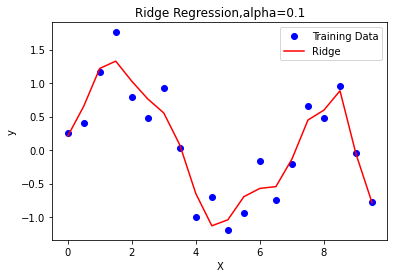

[ 3.00220188e-01  2.60740964e-01  9.53846159e-02 -9.49231793e-02
 -1.46847147e-01  2.88380219e-02  1.41753582e-01 -1.31705156e-01
  5.71334206e-02 -1.47897490e-02  2.45038531e-03 -2.63064515e-04
  1.77528810e-05 -6.85842055e-07  1.15851579e-08]


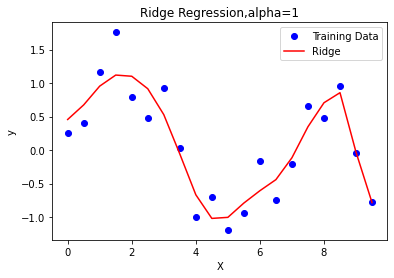

[ 5.62928547e-02  5.62156578e-02  4.17442789e-02  1.81864730e-02
 -1.86260905e-03 -7.86743838e-03 -8.22830413e-03  7.67594935e-03
 -2.19179030e-03  2.25275598e-04  1.58903373e-05 -6.70264291e-06
  7.39276259e-07 -3.79216920e-08  7.74575383e-10]


/home/gandalf/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.3776e-29): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


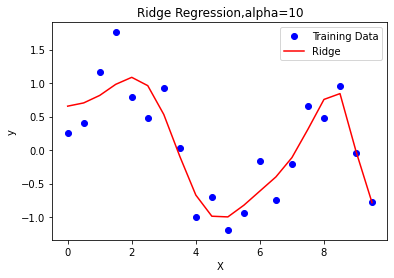

In [5]:


alphas=[0.0001,0.001,0.01,0.1,1,10]
for a in alphas:
  ridge_reg = Ridge(alpha=a)
  ridge_reg.fit(X_poly, y)
  print(ridge_reg.coef_)
  plt.figure(figsize=(6, 4))
  plt.plot(X, y, 'bo', label="Training Data")
  plt.plot(X, ridge_reg.predict(X_poly), 'r-', label="Ridge")
  plt.legend()
  plt.title("Ridge Regression,alpha="+str(a))
  plt.xlabel("X")
  plt.ylabel("y")
  plt.show()

/home/gandalf/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.507e+00, tolerance: 1.276e-03
  model = cd_fast.enet_coordinate_descent(


[ 6.21885912e-01 -3.30863857e-01  2.09918381e-02  1.65635716e-03
  6.43577281e-05 -6.58299444e-07 -4.36146748e-07 -5.67995741e-08
 -5.54036069e-09 -4.58060579e-10 -3.19897565e-11 -1.63272875e-12
 -1.90481636e-15  1.56494552e-14  3.07761719e-15]


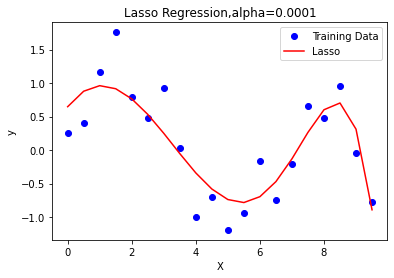

/home/gandalf/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.530e+00, tolerance: 1.276e-03
  model = cd_fast.enet_coordinate_descent(


[ 6.13292924e-01 -3.28298173e-01  2.07678614e-02  1.65602311e-03
  6.44747599e-05 -6.41931687e-07 -4.34648353e-07 -5.66848032e-08
 -5.53276571e-09 -4.57659539e-10 -3.19803655e-11 -1.63432565e-12
 -2.26955604e-15  1.55966241e-14  3.07104222e-15]


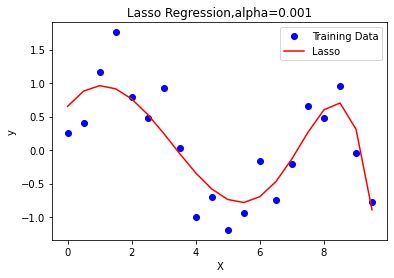

/home/gandalf/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.746e+00, tolerance: 1.276e-03
  model = cd_fast.enet_coordinate_descent(


[ 5.24687026e-01 -3.01560584e-01  1.84080525e-02  1.65201727e-03
  6.58223964e-05 -4.58842774e-07 -4.18179814e-07 -5.54443315e-08
 -5.45240646e-09 -4.53589807e-10 -3.19087530e-11 -1.65452854e-12
 -6.47711072e-15  1.50034109e-14  2.99826731e-15]


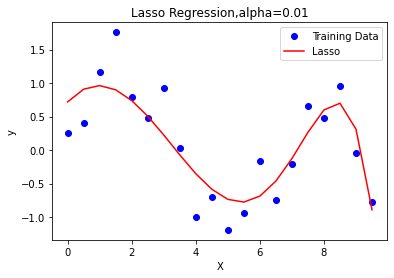

/home/gandalf/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.370e+00, tolerance: 1.276e-03
  model = cd_fast.enet_coordinate_descent(


[ 0.00000000e+00 -1.32148306e-01  1.45957089e-03  1.80247054e-03
  7.89213640e-05  7.19892944e-07 -3.27537977e-07 -4.93581283e-08
 -5.10613481e-09 -4.40352418e-10 -3.22559320e-11 -1.81666296e-12
 -3.22458860e-14  1.17202843e-14  2.61856715e-15]


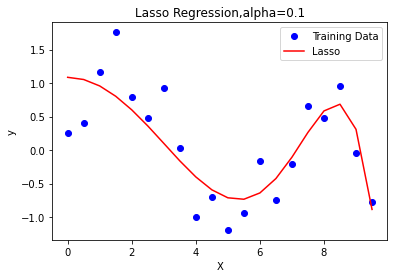

[-0.00000000e+00 -0.00000000e+00 -2.87964644e-02  2.61688815e-03
  1.97303495e-04  4.15157109e-06 -3.29306897e-07 -6.34159800e-08
 -6.87750217e-09 -6.04136522e-10 -4.49412176e-11 -2.62151274e-12
 -6.44345529e-14  1.31389142e-14  3.18671356e-15]


/home/gandalf/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.719e+00, tolerance: 1.276e-03
  model = cd_fast.enet_coordinate_descent(


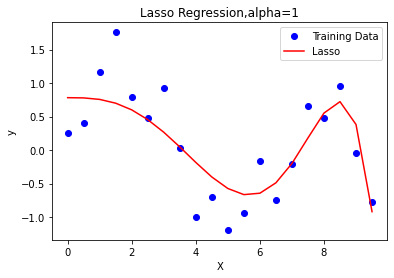

/home/gandalf/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.786e+00, tolerance: 1.276e-03
  model = cd_fast.enet_coordinate_descent(


[-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -3.21003744e-03
  2.81666117e-04  2.21386522e-05  5.15686564e-07 -2.79692999e-08
 -6.14629069e-09 -6.88106023e-10 -6.15775065e-11 -4.64622038e-12
 -2.74592885e-13 -6.93658503e-15  1.37200005e-15]


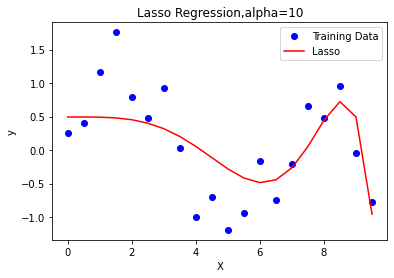

In [6]:
# Fit Lasso Regression

for a in alphas:
  lasso_reg = Lasso(alpha=a)
  lasso_reg.fit(X_poly, y)
  print(lasso_reg.coef_)
  plt.figure(figsize=(6, 4))
  plt.plot(X, y, 'bo', label="Training Data")
  plt.plot(X, lasso_reg.predict(X_poly), 'r-', label="Lasso")
  plt.legend()
  plt.title("Lasso Regression,alpha="+str(a))
  plt.xlabel("X")
  plt.ylabel("y")
  plt.show()
